<div class="alert alert-block" style="color: skyblue">
    <h1><center> DAKD 2024 EXERCISE 3: UNSUPERVISED LEARNING  </center></h1>

### <font color = skyblue> *** FILL YOUR INFORMATION BELOW *** </font>
(Name) Ayesha Zafar<br>
(Date)  13/12/2024<br>

___
#### General Guidance for Exercises

- **Complete all tasks**: Make sure to answer all questions, even if you cannot get your script to fully work.
- **Code clarity**: Write clear and readable code. Include comments to explain what your code does.
- **Effective visualizations**: Ensure all plots have labeled axes, legends, and captions. Your visualizations should clearly represent the underlying data.
- **Notebook organization**: You can add more code or markdown cells to improve the structure of your notebook as long as it maintains a logical flow.
- **Submission**: Submit both the `.ipynb` and `.html` or `.pdf` versions of your notebook. Before finalizing your notebook, use the "Restart & Run All" feature to ensure it runs correctly.
- **Grading criteria**:
    - The grading scale is *Fail/Pass/Pass with honors* (+1).
    - To pass, you must complete the required parts 0-3.
    - To achieve *Pass with honors*, complete the bonus exercises.
- **Technical issues**:
    - If you encounter problems, start with an online search to find solutions but do not simply copy and paste code. Understand any code you use and integrate it appropriately.
    - Cite all external sources used, whether for code or explanations.
    - If problems persist, ask for help in the course discussion forum, at exercise sessions, or via email at konsta.k.nyman@utu.fi or antti.s.vasankari@utu.fi.
- **Use of AI and large language models**:
    - We do not encourage the use of AI tools like ChatGPT. If you use them, critically evaluate their outputs.
    - Describe how you used the AI tools in your work, including your input and how the output was beneficial.
- **Time management**: Do not leave your work until the last moment. No feedback will be available during weekends.

**Additional Notes**:
- You can find the specific deadlines and session times for each assignment on the Moodle course page.
- Ensure all your answers are concise—typically a few sentences per question.
- Your .ipynb notebook is expected to be run to completion, which means that it should execute without errors when all cells are run in sequence.
<br><br>
___

#### Exercise instructions

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

This exercise uses the seeds dataset, available on moodle as `seeds.csv`. The features are all numeric. They quantify the measurements related to the geometrical properties of wheat grains. The feature names are listed in the table below.

| Feature | Type 
| :--- | ---: 
| Area | Numeric (float)
| Perimeter | Numeric (float)
| Compactness | Numeric (float)
| Length | Numeric (float)
| Width | Numeric (float)
| Asymmetry Coefficient | Numeric (float)
| Length Groove | Numeric (float)

<br>


In real applications, visualizing various aspects of the data the data and data scrubbing are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods. **REMEMBER, this step can never be neglected in the real world.** <br><br>
___

#### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional modules here if you want.

In [7]:
import itertools # has some utilities that may be useful in the exercise

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

# IPython magic command to display matplotlib figures together with the output
# (Often the default setting in a Jupyter Notebook context, so your figures probably work fine without it)
%matplotlib inline

### Part 0: Read the data

- Download the exercise 3 data on the **Moodle** page of this course. (`seeds.csv`)
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [9]:
# YOUR CODE

# Reading the data 
seeds_file_path = "seeds.csv" 
seeds_data = pd.read_csv(seeds_file_path) 

# Displaying basic information about data 
print("Basic information about the dataset:")
print(seeds_data.info())
print(seeds_data.describe())

# Displaying few rows of data
print("\nFirst few rows of the dataset:")
seeds_data.head()

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            210 non-null    float64
 1   perimeter       210 non-null    float64
 2   compactness     210 non-null    float64
 3   length          210 non-null    float64
 4   width           210 non-null    float64
 5   asymmetry_coef  210 non-null    float64
 6   length_groove   210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB
None
             area   perimeter  compactness      length       width  \
count  210.000000  210.000000   210.000000  210.000000  210.000000   
mean    14.847524   14.559286     0.870999    5.628533    3.258605   
std      2.909699    1.305959     0.023629    0.443063    0.377714   
min     10.590000   12.410000     0.808100    4.899000    2.630000   
25%     12.270000   13.450000     0.856900    5.262250    

,area,perimeter,compactness,length,width,asymmetry_coef,length_groove
0,18.45,16.12,0.8921,6.107,3.769,2.235,5.794
1,11.41,12.95,0.8560,5.090,2.775,4.957,4.825
2,10.79,12.93,0.8107,5.317,2.648,5.462,5.194
3,18.14,16.12,0.8772,6.059,3.563,3.619,6.011
4,15.38,14.90,0.8706,5.884,3.268,4.462,5.795


### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 - Explain briefly why this is important.
 - For visualization, project the data to two dimensions by using principal component analysis (PCA).
 - **These PCs are solely used for plotting the data.** The clusterings are done on the original standardized features.

First few standardized rows
       area  perimeter  compactness    length     width  asymmetry_coef  \
0  1.241051   1.197927     0.895149  1.082486  1.354502       -0.976818   
1 -1.184225  -1.235208    -0.636258 -1.218381 -1.283404        0.837881   
2 -1.397814  -1.250559    -2.557941 -0.704815 -1.620441        1.174554   
3  1.134256   1.197927     0.263072  0.973890  0.807813       -0.054135   
4  0.183438   0.261515    -0.016908  0.577969  0.024933        0.507875   

   length_groove  
0       0.787113  
1      -1.189192  
2      -0.436605  
3       1.229691  
4       0.789153  


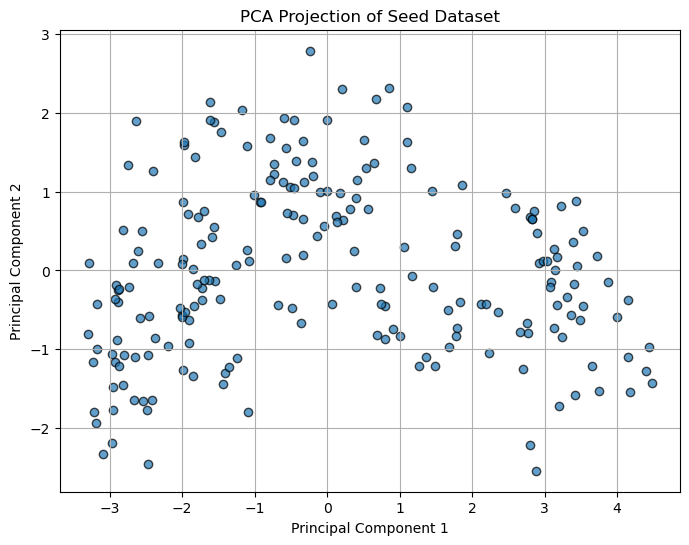

In [11]:
# YOUR CODE

# Standardizing features using z-score standardization
scaler = StandardScaler()
seeds_data_standardized = scaler.fit_transform(seeds_data)

# Converting standardized data back to DataFrame
seeds_data_standardized_df = pd.DataFrame(seeds_data_standardized, columns=seeds_data.columns)

# Displaying first few rows of standardized data
print("First few standardized rows")
print(seeds_data_standardized_df.head())

# Performing PCA to reduce data to two dimensions for visualization
pca = PCA(n_components=2)
seeds_pca = pca.fit_transform(seeds_data_standardized)

# Converting PCA results to a DataFrame
seeds_pca_df = pd.DataFrame(seeds_pca, columns=['PC1', 'PC2'])

# Ploting first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(seeds_pca_df['PC1'], seeds_pca_df['PC2'], alpha=0.7, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Seed Dataset')
plt.grid(True)
plt.show()

<div style="color: skyblue;">
YOUR ANSWER

Standardizing features is important because clustering algorithms like K-Means and hierarchical clustering rely on distance metrics, such as Euclidean distance, to determine how similar or different data points are. If features have different scales, those with larger ranges can dominate the distance calculations, leading to biased or inaccurate results. Standardization ensures that all features contribute equally, making the clustering process more accurate and reliable.

 - Visualize the resulting two-dimensional data in a scatter plot.
 - Does it look like there are clear clusters? Don't worry if they're hard to see. There may be more than one "correct" answer.
 - Draw shapes (for example `matplotlib.patches.Ellipse`) on top of the scatter plot to visualize any clusters you feel you can easily detect.

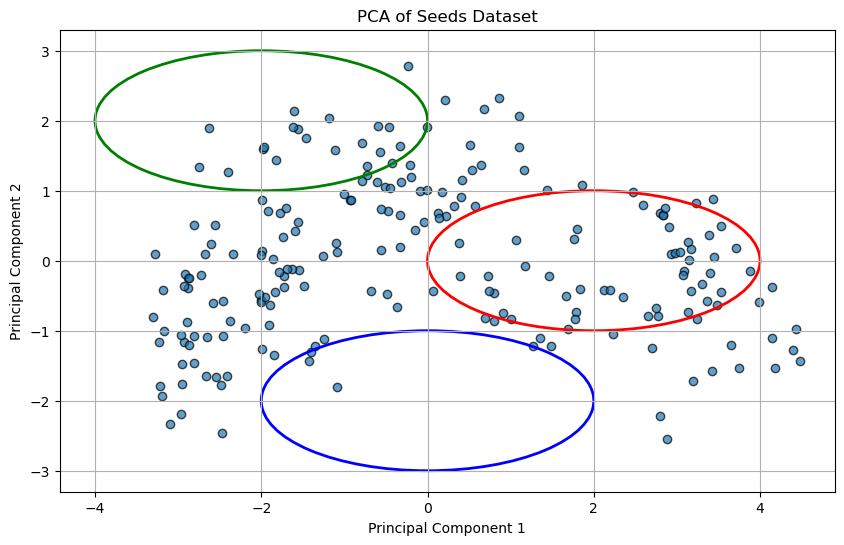

In [14]:
# YOUR CODE

import matplotlib.patches as patches

# Ploting first two principal components with scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(seeds_pca_df['PC1'], seeds_pca_df['PC2'], edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Seeds Dataset')
plt.grid(True)

# Defining ellipses dynamically based on identified clusters
ellipse_params = [
    ((2, 0), 4, 2, 'r'),    
    ((-2, 2), 4, 2, 'g'),   
    ((0, -2), 4, 2, 'b'),  
]
for center, width, height, color in ellipse_params:
    ellipse = patches.Ellipse(center, width, height, edgecolor=color, facecolor='none', lw=2)
    plt.gca().add_patch(ellipse)

plt.show()

<div style="color: skyblue;">
YOUR ANSWER

1. Red Ellipse: This group of points, centered within the red ellipse, appears distinct from the others. The points in this cluster are tightly packed, indicating a close relationship among them.

2. Green Ellipse: The points within the green ellipse form another group. These points are separate from Cluster 1 and also seem to be relatively close to each other, forming a cohesive cluster.

3. Blue Ellipse: The third group of points is enclosed by the blue ellipse. This cluster stands out from the other two and represents another distinct collection of data points.

### Part 2a: Agglomerative hierarchical clustering theory
Explain briefly the different linkage criterion values.
- Single: <p style="color: skyblue;">YOUR ANSWER</p>
Single linkage defines the distance between two clusters as the shortest distance between any two points, one from each cluster. It tends to form long, chain-like clusters.


- Average: <p style="color: skyblue;">YOUR ANSWER</p>
Average linkage calculates the distance as the average of all pairwise distances between points in two clusters. It tends to create more balanced clusters than single linkage.


- Complete: <p style="color: skyblue;">YOUR ANSWER</p>
Complete linkage measures the distance between clusters as the maximum distance between any two points, one from each cluster. It results in more compact, tightly grouped clusters.


- Ward: <p style="color: skyblue;">YOUR ANSWER</p>
Ward's linkage minimizes the variance within clusters. It merges clusters that result in the smallest increase in within-cluster variance, often producing well-balanced clusters.

Explain the **silhouette coefficient** (silhouette_score).

<div style="color: skyblue;">
YOUR ANSWER

The silhouette coefficient measures how similar a point is to its own cluster compared to other clusters. Scores range from -1 (wrong cluster) to +1 (well-clustered). A higher score indicates better-defined clusters.

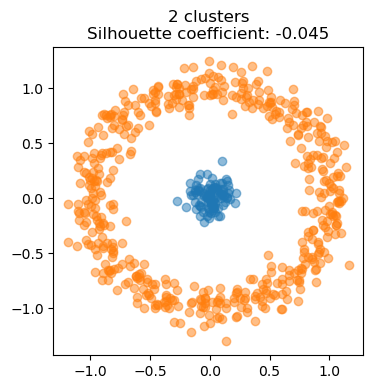

In [19]:
n = 2
no_in = 100
no_out = 500
labels = np.concatenate((np.zeros(no_in), np.ones(no_out)))

inner_cluster = np.random.randn(no_in, 2)*0.1
theta = np.linspace(0, 2*np.pi, no_out)
outer_cluster = np.array([np.cos(theta), np.sin(theta)]).T + np.random.randn(no_out, 2)*0.1
data = np.vstack((inner_cluster, outer_cluster))

score = silhouette_score(data, labels)

plt.figure(figsize=(4, 4))
plt.title(f'{n} clusters\nSilhouette coefficient: {score:.3f}')
for c in range(n):
    plt.scatter(data[labels==c, 0], data[labels==c, 1], alpha=0.5)
    
plt.show()

In the figure above, why is the silhouette coefficient close to zero even though the clusters are clearly distinct?
 
(Optional) What would be a better way to assess this clustering?

 <div style="color: skyblue;">YOUR ANSWER

The silhouette coefficient can sometimes be close to 0, even when clusters appear visually distinct. This happens because the score measures how well points within a cluster are separated from points in other clusters. If clusters overlap or if points within a cluster are spread out, the silhouette score can be low, even if the clusters look clear in a plot. Also, factors like the data's distribution and the distance measure used can influence the silhouette score, so it doesn't always perfectly reflect how easy it is to visually separate the clusters, especially in lower-dimensional plots.


Better Ways to Assess Clusters:

1. Adjusted Rand Index (ARI): This compares how well the clustering matches the actual class labels, while accounting for random chance. A higher ARI means the clustering is closer to the true class structure.

2. Davies-Bouldin Index: This measures how similar clusters are to their most similar neighbor. A lower score suggests better clustering, with more distinct and well-separated groups.

3. Cluster Purity: This checks how much of a cluster belongs to a single class. Higher purity means that the points in each cluster are mostly from the same class, indicating clearer clusters.

4. Elbow Method (for K-means): This method helps determine the best number of clusters by plotting the explained variance against the number of clusters. The "elbow point," where the curve levels off, suggests the optimal number of clusters.

### Part 2b: Agglomerative hierarchical clustering practice

Let's get back to the **seeds** dataset.

Cluster the standardized data into 2-10 clusters using agglomerative hierarchical clustering.
- Explore all combinations of the **number of clusters** (2-10) and the **linkage criteria**.
- Calculate the silhouette coefficient for each combination and store the results, as well as the predictions made by the clustering.

*Tip: you can use `itertools.product` function to get the Cartesian product of the two lists of hyperparameters (number of clusters, linkage criterion)*

In [24]:
# YOUR CODE

num_clusters = range(2, 11) 
linkage_criteria = ['single', 'average', 'complete', 'ward']

results = {
    'num_clusters': [],
    'linkage': [],
    'silhouette_score': [],
    'predictions': []
}

# Performing clustering and calculating silhouette scores
for n_clusters, linkage in itertools.product(num_clusters, linkage_criteria):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    cluster_labels = model.fit_predict(seeds_data_standardized)
    silhouette_avg = silhouette_score(seeds_data_standardized, cluster_labels)
    results['num_clusters'].append(n_clusters)
    results['linkage'].append(linkage)
    results['silhouette_score'].append(silhouette_avg)
    results['predictions'].append(cluster_labels)

# Converting results to DataFrame
results_df = pd.DataFrame(results)

# Displaying results sorted by silhouette score (high to low)
print(results_df.sort_values(by='silhouette_score', ascending=False)[['num_clusters', 'linkage', 'silhouette_score']])


    num_clusters   linkage  silhouette_score
3              2      ward          0.461297
2              2  complete          0.451995
1              2   average          0.441339
7              3      ward          0.392634
5              3   average          0.375957
9              4   average          0.354864
6              3  complete          0.350198
10             4  complete          0.314857
11             4      ward          0.300576
14             5  complete          0.293720
17             6   average          0.290306
29             9   average          0.279423
13             5   average          0.275231
15             5      ward          0.274639
25             8   average          0.270292
21             7   average          0.268883
33            10   average          0.257456
27             8      ward          0.232726
23             7      ward          0.232041
31             9      ward          0.225972
35            10      ward          0.221841
22        

- Use the silhouette score to determine the best linkage criterion for each number of clusters (2-10).
- For each number of clusters, display the best linkage criterion and the silhouette score, sorted by the score (high to low) as follows:

| Number of clusters | Linkage criterion | Silhouette score
| --- | --- | ---   

In [26]:
# YOUR CODE

# Grouping results by number of clusters and sorting by silhouette score
best_linkage_per_cluster = results_df.loc[results_df.groupby('num_clusters')['silhouette_score'].idxmax()]

# Sorting overall results by silhouette score in descending order
best_linkage_per_cluster_sorted = best_linkage_per_cluster.sort_values(by='silhouette_score', ascending=False)

# Displaying results
best_linkage_per_cluster_sorted = best_linkage_per_cluster_sorted[['num_clusters', 'linkage', 'silhouette_score']]
print(best_linkage_per_cluster_sorted)

    num_clusters   linkage  silhouette_score
3              2      ward          0.461297
7              3      ward          0.392634
9              4   average          0.354864
14             5  complete          0.293720
17             6   average          0.290306
29             9   average          0.279423
25             8   average          0.270292
21             7   average          0.268883
33            10   average          0.257456


 - Plot four clusterings with **three clusters**, one of each **linkage criterion**, as scatter plots.
 - Again, use the first two PCs for visualization. 
 - Colour the datapoints according to the clusters they were assigned to.
 - The structure of the plot is provided

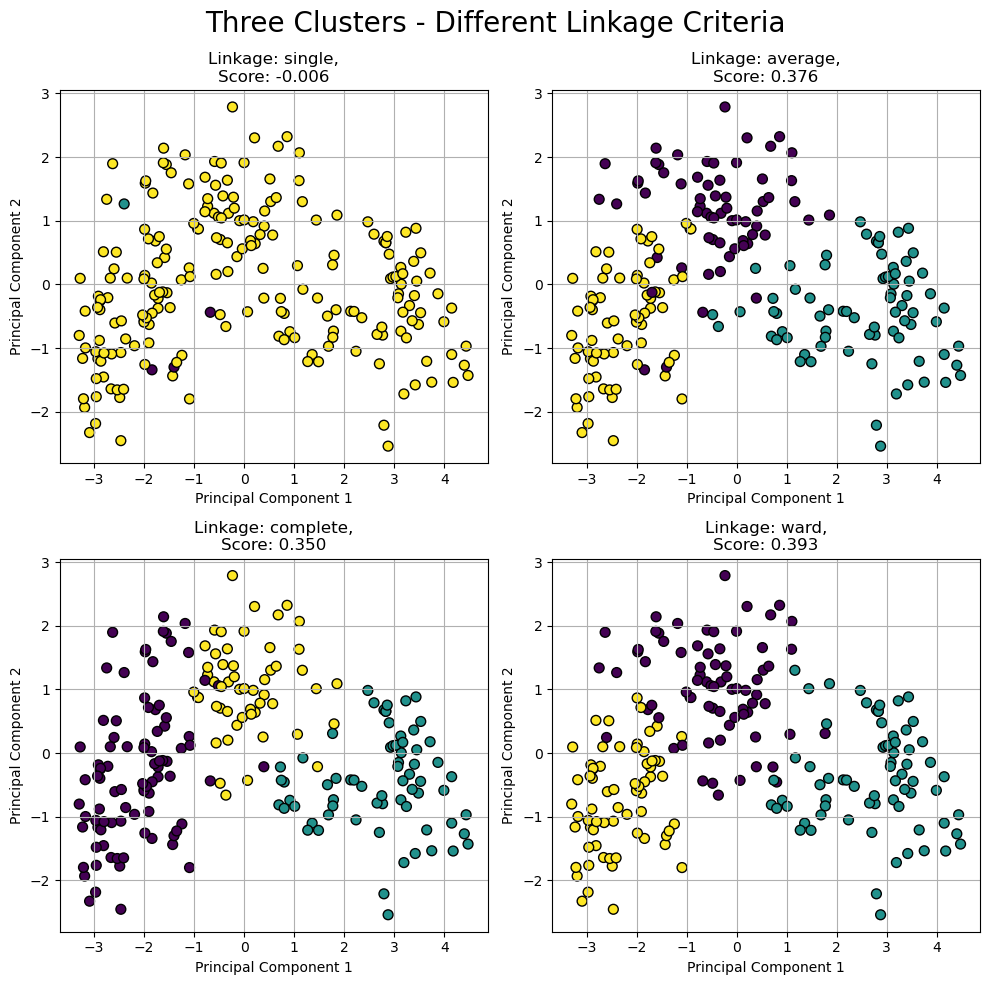

In [28]:
# YOUR CODE

linkage_criteria = ["single", "average", "complete", "ward"]
num_clusters = 3

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Three Clusters - Different Linkage Criteria", fontsize=20)

axes = axes.flatten()
scatter_plots = []

for i, ax in enumerate(axes):
    model = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage_criteria[i])
    cluster_labels = model.fit_predict(seeds_data_standardized)
    
    scatter = ax.scatter(seeds_pca_df['PC1'], seeds_pca_df['PC2'], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
    scatter_plots.append(scatter)
    ax.set_title(f"Linkage: {linkage_criteria[i]},\nScore: {results_df[(results_df['num_clusters'] == num_clusters) & (results_df['linkage'] == linkage_criteria[i])]['silhouette_score'].values[0]:.3f}")
    
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9) 
plt.show()

 - Similarly, from the clusterings using **'ward'** linkage criterion, plot the four clusterings of best performing **number of clusters** as scatter plots.

    num_clusters  silhouette_score
3              2          0.461297
7              3          0.392634
11             4          0.300576
15             5          0.274639


C:\Users\Ayesha\AppData\Local\Temp\ipykernel_17008\3348854959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_ward_clusters['num_clusters'] = best_ward_clusters['num_clusters'].astype(int)


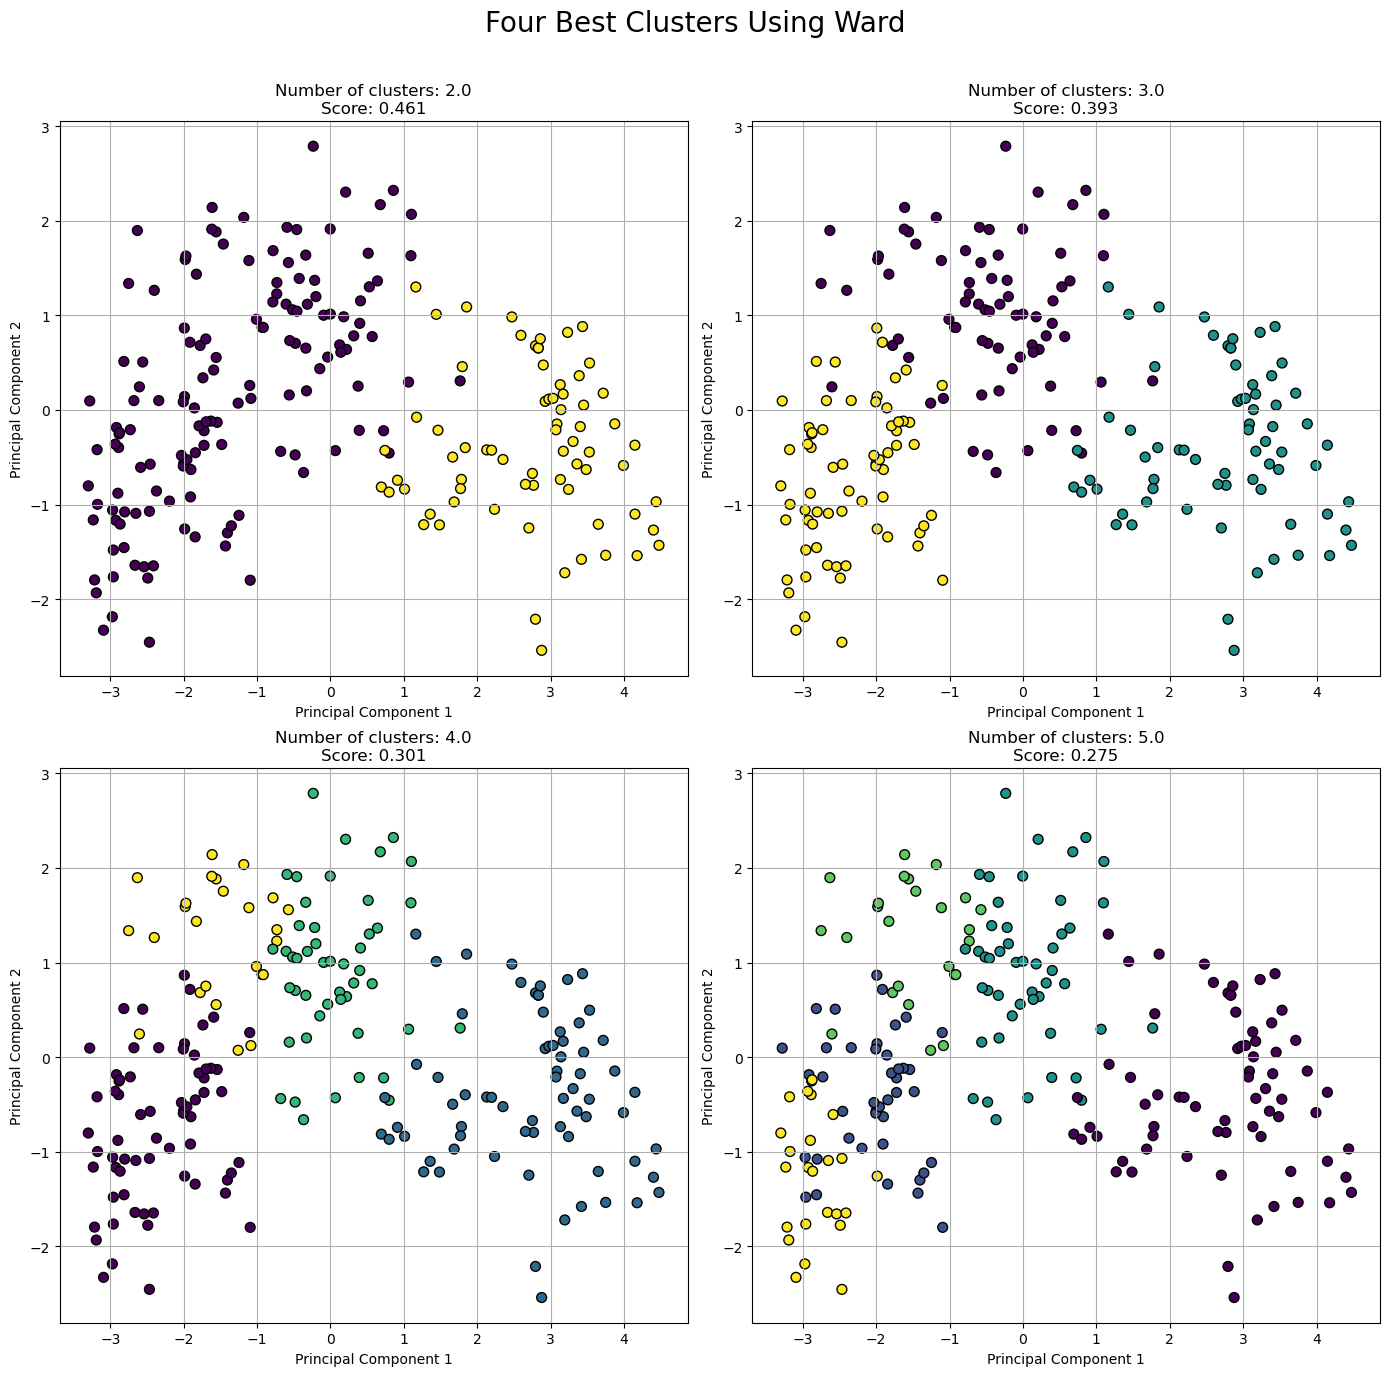

In [30]:
# YOUR CODE

ward_results = results_df[results_df['linkage'] == 'ward']
ward_results_sorted = ward_results.sort_values(by='silhouette_score', ascending=False).head(4)

# Extracting best performing number of clusters and their scores
best_ward_clusters = ward_results_sorted[['num_clusters', 'silhouette_score']]
print(best_ward_clusters)

best_ward_clusters['num_clusters'] = best_ward_clusters['num_clusters'].astype(int)

fig, axes = plt.subplots(2, 2, figsize=(14, 14))
fig.suptitle("Four Best Clusters Using Ward", fontsize=20)

axes = axes.flatten()

for i, ax in enumerate(axes):
    num_clusters = best_ward_clusters.iloc[i]['num_clusters']
    silhouette_score = best_ward_clusters.iloc[i]['silhouette_score']
    
    # Initializing AgglomerativeClustering model
    model = AgglomerativeClustering(n_clusters=int(num_clusters), linkage='ward')
    
    # Fitting model and predicting the cluster labels
    cluster_labels = model.fit_predict(seeds_data_standardized)
    
    # Ploting clusters using first two principal components
    scatter = ax.scatter(seeds_pca_df['PC1'], seeds_pca_df['PC2'], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
    ax.set_title(f"Number of clusters: {num_clusters}\nScore: {silhouette_score:.3f}")
    
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Think about the clusters you see and how the choice of the linkage criterion and the number of clusters affected the formation of clusters. No need to write an answer.

Do some of the clusterings discovered by agglomerative hierarchical clustering correspond to what visually looked like clusters to you in Part 1? Which ones? It's absolutely fine if they don't.

<div style="color: skyblue;">
YOUR ANSWER

Yes, some of the clusterings discovered through agglomerative hierarchical clustering did match the visual clusters from Part 1. In particular, the clusterings using the Ward linkage with 2 or 3 clusters seemed to align well with the visually detectable groups. The Average and Complete linkage methods, with 4 or 5 clusters, also showed similarities to the clusters we could see visually. However, the Single linkage method didn't perform as well. It tends to form elongated clusters that don't correspond to the more compact and well-separated visual clusters we observed in Part 1.

### Part 3: _k_-means clustering

- Perform _k_-means clustering on the standardized data. Try 2-10 numbers of clusters.
- Evaluate the clustering performance using the silhouette coefficient.
- Store the centroids of the clusters

In [48]:
import os 
import warnings 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

# Supressing warning
os.environ['OMP_NUM_THREADS'] = '1'
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# Defining range of clusters to try
num_clusters_range = range(2, 11)
silhouette_scores = []
centroids = {}

for n_clusters in num_clusters_range:
    # Initializing KMeans model with n_init = 10
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    
    # Fiting model to standardized data
    kmeans.fit(seeds_data_standardized)
    
    # Predicting cluster labels
    cluster_labels = kmeans.labels_
    
    # Calculating silhouette score using a differently named variable
    sil_score = silhouette_score(seeds_data_standardized, cluster_labels)
    silhouette_scores.append((n_clusters, sil_score))
    
    # Storing cluster centroids
    centroids[n_clusters] = kmeans.cluster_centers_

# Converting silhouette scores to a dataFrame
silhouette_scores_df = pd.DataFrame(silhouette_scores, columns=['num_clusters', 'silhouette_score'])
print(silhouette_scores_df)

# Displaying centroids
for n_clusters, centroid in centroids.items():
    print(f"\nNumber of clusters: {n_clusters}")
    print(centroid)

   num_clusters  silhouette_score
0             2          0.465772
1             3          0.400727
2             4          0.334791
3             5          0.286215
4             6          0.291731
5             7          0.273970
6             8          0.259347
7             9          0.254613
8            10          0.255694

Number of clusters: 2
[[-0.66037844 -0.66456614 -0.31481355 -0.65345998 -0.61751272  0.08483047
  -0.66556936]
 [ 1.14065367  1.14788697  0.54376886  1.1287036   1.06661287 -0.14652535
   1.1496198 ]]

Number of clusters: 3
[[-1.03025257 -1.00664879 -0.9649051  -0.89768501 -1.08558344  0.69480448
  -0.62480856]
 [ 1.25668163  1.26196622  0.56046437  1.23788278  1.16485187 -0.04521936
   1.29230787]
 [-0.14111949 -0.17004259  0.4496064  -0.25781445  0.00164694 -0.66191867
  -0.58589311]]

Number of clusters: 4
[[ 0.43032887  0.48154667  0.2335189   0.45429113  0.43450761  0.18629161
   0.4591566 ]
 [-0.29660059 -0.3454492   0.44455581 -0.45361713 -0.12

 - Choose the four best numbers of clusters according to silhouette coefficient that you discovered above.
 - Once again visualize them on a scatter plot of the first two principal components.
 - Display the centroids of the clusters on the plot.
 - Remember to transform the centroids to the PCA space.
 - Explain why you need to transform the centroids.

<div style="color: skyblue;">
YOUR ANSWER

To make sure that the centroids' positions accurately match the PCA-transformed data points, we transform them to the PCA space. Plotting the centroids in the incorrect coordinates without this adjustment might result in deceptive visuals.

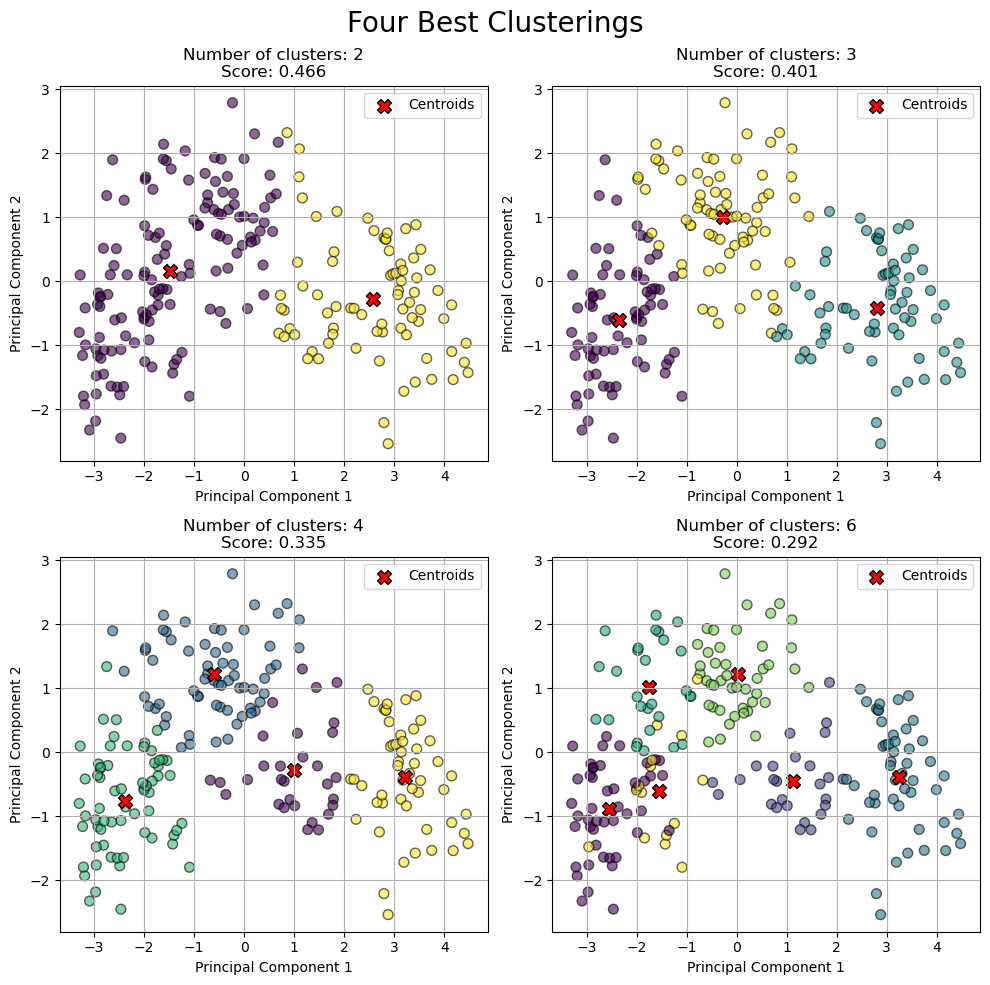

In [52]:
# Define the four best numbers of clusters
best_clusters = [2, 3, 4, 6]

# Initializing PCA with 2 components
pca = PCA(n_components=2)
pca.fit(seeds_data_standardized)

# Transforming standardized data to PCA space
seeds_pca = pca.transform(seeds_data_standardized)
seeds_pca_df = pd.DataFrame(seeds_pca, columns=['PC1', 'PC2'])

# Transform centroids to PCA space
def transform_centroids(centroids, pca):
    return pca.transform(centroids)

# Creating figure for plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Four Best Clusterings", fontsize=20)

axes = axes.flatten()  

for i, ax in enumerate(axes):
    num_clusters = best_clusters[i]
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(seeds_data_standardized)
    cluster_centroids = transform_centroids(kmeans.cluster_centers_, pca)

    scatter = ax.scatter(seeds_pca_df['PC1'], seeds_pca_df['PC2'], c=cluster_labels, cmap='viridis', s=50, alpha=0.6, edgecolor='k')
    
    ax.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], edgecolor='k', c='red', marker='X', s=100, label='Centroids')
    
    silhouette_score = silhouette_scores_df[silhouette_scores_df['num_clusters'] == num_clusters]['silhouette_score'].values[0]
    
    ax.set_title(f"Number of clusters: {num_clusters}\nScore: {silhouette_score:.3f}")
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

### Part 4 (BONUS): Filling in missing labels using clustering

In this bonus exercise, you're given a dataset with almost all of the labels missing. This is the starting point in semi-supervised learning. Semi-supervised learning in general is beyond the scope of this course, but if you want you can learn more about it, starting e.g. on [the sklearn page for semi-supervised learning](https://scikit-learn.org/stable/modules/semi_supervised.html). **This exercise does not require researching semi-supervised learning, however.**

The dataset used in this exercise is a slightly modified version of [the wine dataset](https://archive.ics.uci.edu/dataset/109/wine). The features quantify chemical properties of wine, grown around the same area in Italy. They are divided to three different classes, simply called `1`, `2` and `3` here. The feature names and their data types are listed in the table below. **Use the modified dataset on Moodle, with the filename `wine_missing_labels.csv`**


| Feature | Type 
| :--- | ---: 
| Alcohol | Numeric (float)
| Malic acid | Numeric (float)
| Ash | Numeric (float)
| Alcalinity of ash | Numeric (float)
| Magnesium | Numeric (integer)
| Total phenols | Numeric (float)
| Flavanoids | Numeric (float)
| Nonflavanoid phenols | Numeric (float)
| Proanthocyanins | Numeric (float)
| Color intensity | Numeric (float)
| Hue | Numeric (float)
| OD280/OD315 of diluted wines | Numeric (float)
| Proline | Numeric (integer)

<br>

First, visualize the first two principal components of the dataset in a scatter plot, showing the labels real for data points you were given. Try to see if the labels look like they belong in what look like clusters on the plot.

   Label  Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    2.0    11.82        1.47  1.99          20.8         86           1.98   
1    NaN    13.29        1.97  2.68          16.8        102           3.00   
2    NaN    13.05        1.73  2.04          12.4         92           2.72   
3    NaN    12.64        1.36  2.02          16.8        100           2.02   
4    NaN    12.20        3.03  2.32          19.0         96           1.25   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        1.60                  0.30             1.53             1.95  0.95   
1        3.23                  0.31             1.66             6.00  1.07   
2        3.27                  0.17             2.91             7.20  1.12   
3        1.41                  0.53             0.62             5.75  0.98   
4        0.49                  0.40             0.73             5.50  0.66   

   OD280  Proline  
0   3.33      495  
1   2.84  

C:\Users\Ayesha\AppData\Local\Temp\ipykernel_17008\1965265077.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PC1'], subset['PC2'], label=label, cmap='viridis', s=50, edgecolor='k')


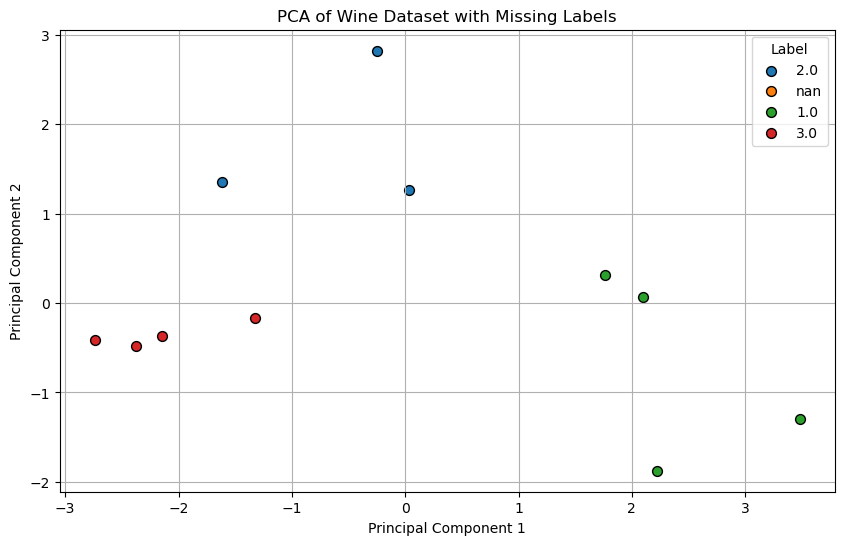

In [54]:
# YOUR CODE

data_path = "wine_missing_labels.csv" 
wine_data = pd.read_csv(data_path)
print(wine_data.head())

# Standardizing features (excluding the label column)
features = wine_data.drop(columns=['Label'])
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Performing PCA to reduce data to two dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_standardized)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

# Adding labels back to PCA DataFrame
pca_df['Label'] = wine_data['Label']

# Visualizing  first two principal components
plt.figure(figsize=(10, 6))
for label in pca_df['Label'].unique():
    subset = pca_df[pca_df['Label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, cmap='viridis', s=50, edgecolor='k')
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset with Missing Labels')

plt.legend(title='Label')
plt.grid(True)
plt.show()

<div style="color: skyblue;">
YOUR ANSWER

The scatter plot of the first two principal components reveals that the labeled data points naturally form three distinct clusters. This suggests that the wine samples can be grouped into three categories based on their chemical properties. The clear separation between these groups indicates that clustering could be an effective way to predict the missing labels in the dataset.

Your task is to use clustering to assign labels to the rows that have a missing value as their label. Do this by first clustering all of the data, and then filling in the missing labels based on which clusters the data points with known labels tend to fit in. 

Use whichever clustering methods you prefer. You can cluster the data into 3 clusters because you have 3 known labels, but you could also try a higher number of clusters that you can then merge.

The details of how exactly you decide which rows get assigned which label are up to you - you can get creative. Describe and justify your thought process.

<br>

You are also given the full labels for the dataset in a separate file called `wine_labels.csv`. Plot the real labels next to the labels that your clustering attempts predicted.

Finally, compute the adjusted Rand index for labels predicted by your clustering solutions and the real labels, and display it along the scatter plots. Rand index is a measure of similarity between two partitions of a set of elements. Adjusted Rand index is corrected for chance using the maximum and expected values of Rand index. Optionally, you can learn more about the Rand index e.g. on [the Wikipedia page for Rand index](https://en.wikipedia.org/wiki/Rand_index). Here you can simply use the `sklearn.metrics.adjusted_rand_score` method imported at the beginning of this notebook without further understanding of it. 

*Hint: you should get something over 0.8*

C:\Users\Ayesha\AppData\Local\Temp\ipykernel_17008\2244489563.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PC1'], subset['PC2'], label=label, cmap='viridis', edgecolor='k', s=100)


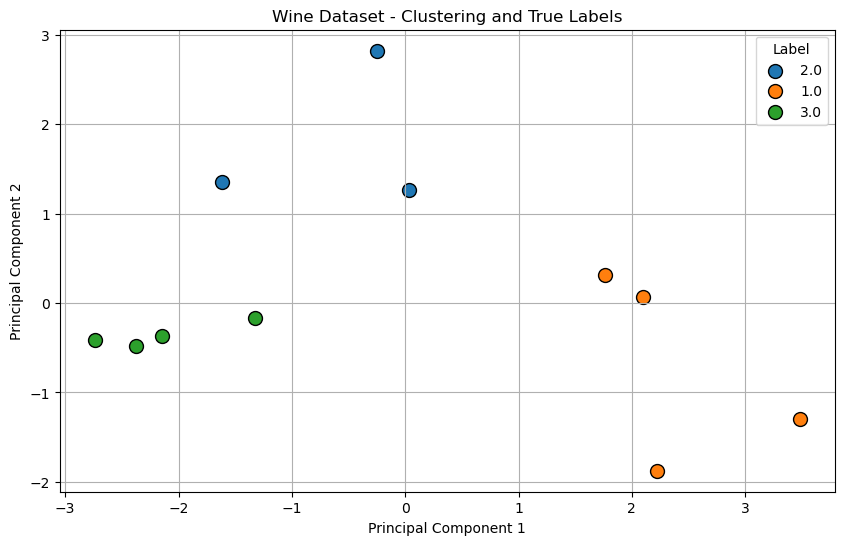

In [57]:
# YOUR CODE

wine_data = pd.read_csv("wine_missing_labels.csv")
wine_labels = pd.read_csv("wine_labels.csv")

features = wine_data.drop(columns=['Label']) 
features_standardized = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_standardized)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Label'] = wine_data['Label']

plt.figure(figsize=(10, 6))
for label in pca_df['Label'].dropna().unique():
    subset = pca_df[pca_df['Label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, cmap='viridis', edgecolor='k', s=100)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wine Dataset - Clustering and True Labels')
plt.legend(title='Label')
plt.grid(True)
plt.show()

C:\Users\Ayesha\AppData\Local\Temp\ipykernel_17008\810239834.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', cmap='viridis', edgecolor='k', s=100)


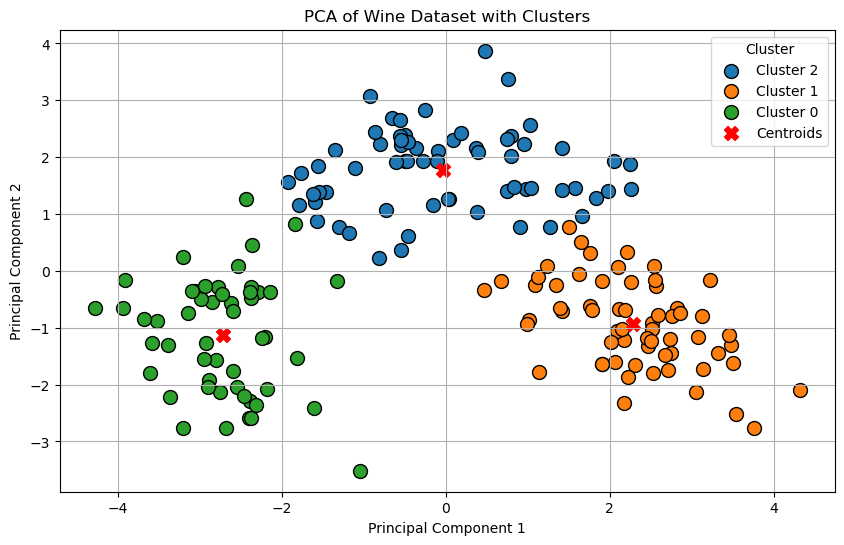

In [58]:
# Performig K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
wine_data['Cluster'] = kmeans.fit_predict(features_standardized)

# Addig cluster labels to PCA DataFrame
pca_df['Cluster'] = kmeans.labels_

# Visualizing clusters
plt.figure(figsize=(10, 6))
for cluster in pca_df['Cluster'].unique():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', cmap='viridis', edgecolor='k', s=100)


# Ploting centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)  # Transform centroids to PCA space

# Marking centroids with distinct marker
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='red', marker='X', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset with Clusters')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

C:\Users\Ayesha\AppData\Local\Temp\ipykernel_17008\2782927065.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wine_data['Label'].fillna(-1, inplace=True)
C:\Users\Ayesha\AppData\Local\Temp\ipykernel_17008\2782927065.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['PC1'], subset['PC2'], label=label, cmap='viridis', edgecolor='k', s=50)


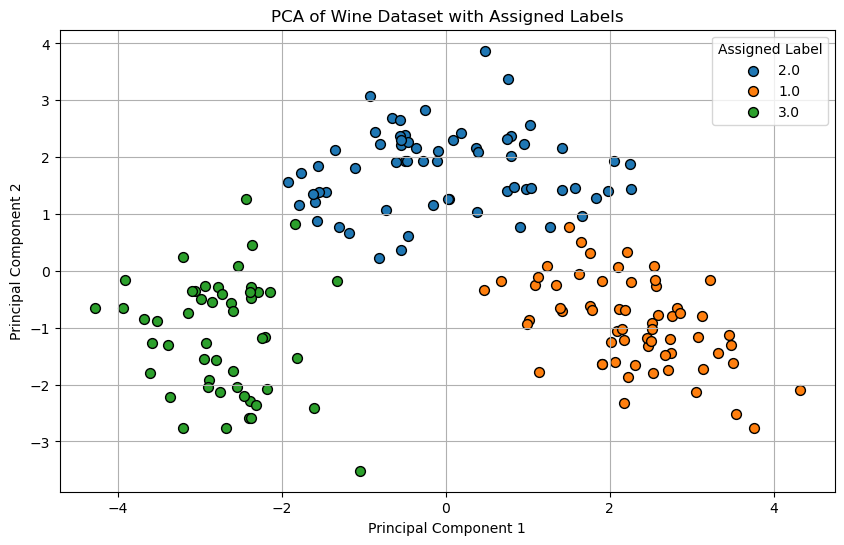

In [59]:
# Assigning labels to rows with missing labels based on clustering results
# Setting missing labels with -1 for processing
wine_data['Label'].fillna(-1, inplace=True)

# Assigning cluster labels to missing values
def assign_labels(row, cluster_to_label_map):
    if row['Label'] == -1:
        return cluster_to_label_map[row['Cluster']]
    else:
        return row['Label']

# Creating a map of clusters to labels
cluster_to_label_map = wine_data[wine_data['Label'] != -1].groupby('Cluster')['Label'].agg(lambda x: x.mode()[0]).to_dict()

# Applying function to assign labels
wine_data['Assigned_Label'] = wine_data.apply(assign_labels, axis=1, cluster_to_label_map=cluster_to_label_map)

# Visualizing assigned labels on PCA plot
pca_df['Assigned_Label'] = wine_data['Assigned_Label']

plt.figure(figsize=(10, 6))
for label in pca_df['Assigned_Label'].unique():
    subset = pca_df[pca_df['Assigned_Label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, cmap='viridis', edgecolor='k', s=50)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset with Assigned Labels')
plt.legend(title='Assigned Label')
plt.grid(True)
plt.show()

C:\Users\Ayesha\AppData\Local\Temp\ipykernel_17008\469835620.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(subset['PC1'], subset['PC2'], label=label,cmap='viridis', edgecolor='k', s=50)
C:\Users\Ayesha\AppData\Local\Temp\ipykernel_17008\469835620.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1].scatter(subset['PC1'], subset['PC2'], label=label, cmap='viridis', edgecolor='k', s=50)


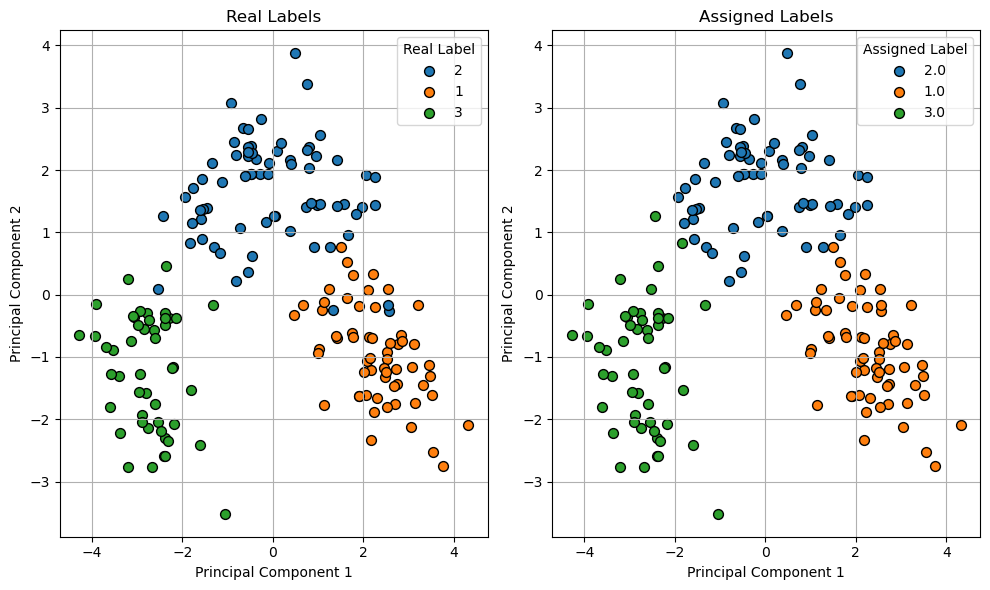

In [60]:
# Loading real labels
wine_data_real = wine_labels.rename(columns={'Label': 'Real_Label'})

# Merging real labels with assigned labels
merged_df = pd.merge(wine_data, wine_data_real, left_index=True, right_index=True)

# Adding real labels to PCA DataFrame
pca_df['Real_Label'] = merged_df['Real_Label']

# Ploting real and assigned labels
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Ploting real labels
axes[0].set_title('Real Labels')
for label in pca_df['Real_Label'].unique():
    subset = pca_df[pca_df['Real_Label'] == label]
    axes[0].scatter(subset['PC1'], subset['PC2'], label=label,cmap='viridis', edgecolor='k', s=50)
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(title='Real Label')
axes[0].grid(True)

# Ploting assigned labels
axes[1].set_title('Assigned Labels')
for label in pca_df['Assigned_Label'].unique():
    subset = pca_df[pca_df['Assigned_Label'] == label]
    axes[1].scatter(subset['PC1'], subset['PC2'], label=label, cmap='viridis', edgecolor='k', s=50)
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend(title='Assigned Label')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [61]:
# Computing adjusted rand index
ari_score = adjusted_rand_score(merged_df['Real_Label'], merged_df['Assigned_Label'])
print(f'Adjusted Rand Index: {ari_score:.3f}')

Adjusted Rand Index: 0.897


<div style="color: skyblue;">
YOUR ANSWER

Clustering Method: Since the dataset contains three known classes, I opted to use K-means clustering with three clusters. This choice aligns with the number of classes in the dataset, ensuring that the clusters should roughly correspond to the actual groups.

Label Assignment: For the missing labels, I assigned each data point in a cluster the most frequent (mode) label of the known data points within that same cluster. This approach helps ensure that the majority of points within each cluster share the same label, making the assignment process more reliable and consistent.

Visualization and Comparison: To compare how well the assigned labels match the true labels, I used Principal Component Analysis (PCA) for dimensionality reduction and visualized the data in two dimensions. This allows a clear, intuitive comparison of how the clusters correspond to the actual classes, showing any potential misclassifications or patterns.

Evaluation: To objectively evaluate the accuracy of the clustering, I calculated the adjusted Rand index. This metric provides a quantitative measure of similarity between the predicted labels and the true labels, giving insight into how well the clustering method performed.